## Logistic Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.animation as animation
import time

from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

# my project
from module.conf import PROJECT_DIR

# %matplotlib tk

1. Load data

In [3]:
def load_data():
    data = np.loadtxt(fname="".join([PROJECT_DIR, "/data/regression/winequality-red.csv"]), delimiter=",", dtype=float, skiprows=1)
    # return data[:,0].reshape(data.shape[0], 1), [map_label(i) for i in data[:, -1]]
    return data[:,:-1], [0 if i < 6 else 1 for i in data[:, -1]]

2. Define sigmoid:
- $z = \mathbf w \cdot \mathbf x + b$
- $f(z) = sigmoid(z) = f_{w,b}(x) = sigmoid(\mathbf w \cdot \mathbf x + b)$

In [4]:
def sigmoid(z: np.ndarray) -> float:
    return 1/(1 + np.exp(-z))

3. Calculate Cost function
$$
J(w,b) = \frac{1}{m}\sum_{i=0}^{m-1}[(-y_i(f_{\mathbf{\mathbf w},b}( \mathbf{x}_i)) - (1 - y_i)( 1 - f_{\mathbf{\mathbf w},b}( \mathbf{x}_i))]
$$

In [5]:
def calc_cost(w: np.ndarray, b: float, X: np.ndarray, y: np.ndarray) -> float:
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    cost /= m
    return cost

4. Calculate gradient
$$

$$

In [6]:
def calc_gradient(w: np.ndarray, b: float, X: np.ndarray, y: np.ndarray, lambda_: float= 1.0) -> tuple:
    """
    w: (n,1)
    b: scalar
    X: (m, n) - m: count of rows, n: number of features
    y: (m,1) - label
    """
    m, n = X.shape
    w_result = np.zeros(shape=w.shape)
    b_result = 0.0
    for i in range(m):
        zi = (np.dot(w, X[i]) + b)
        f = sigmoid(z=zi)
        f_y = (f - y[i])
        for j in range(n):
            w_result[j] += f_y * X[i, j]
            pass
        b_result += f_y
        pass
    
    for i in range(n):
        w_result[i] += lambda_ * w[i]
        
    w_result /= m
    b_result /= m
    return w_result, b_result

5. Features scaling *(optional)*

In [7]:
scaler = MinMaxScaler((1,2,))
# scaler = StandardScaler()
def features_scalling(X: np.ndarray) -> np.ndarray:
    # z-scored
    # m = X.shape[0]
    # n = X.shape[1]

    global scaler_result 
    scaler_result = scaler.fit(X=X)
    return scaler_result.transform(X=X)

6. Calculate gradient descent

In [8]:
def calc_gradient_descent(X: np.ndarray, y: np.ndarray, w_0: np.ndarray, b_0: float, grad_func: calc_gradient, alpha: float, iter: int = 1000) -> tuple:
    w = [w_0]
    b = [b_0]
    min_cost = -1
    for _ in range(iter):
        grad_w, grad_b = grad_func(w[-1], b[-1], X, y)
        w_new = w[-1] - alpha * grad_w
        b_new = b[-1] - alpha * grad_b
        # print(f"grad_w:{grad_w} grad_b:{grad_b} |{np.linalg.norm(grad_w)}|{np.linalg.norm(grad_b)}")
        # print(f"grad_b:{grad_b}")
        w.append(w_new)
        b.append(b_new)
        # if np.linalg.norm(grad_w) < 3 and np.linalg.norm(grad_b) < 6e-1:
        #     break
        # cost = calc_cost(w[-1], b[1], X, y)
        # min_cost = cost if cost > min_cost else min_cost
        # if cost < 6e-1:
        #     break
        pass
    return w, b, min_cost

In [9]:
def predict(w: np.ndarray, b: float, x: np.ndarray) -> float:
    y_pred = sigmoid(z=np.dot(w, x) + b)
    # print(f"===== pred:{y_pred}\nw={w}\nb={b}\nx={x}")
    return 0 if y_pred < 0.5 else 1
    # return y_pred

#### map_feature

In [10]:
def map_feature(X: np.ndarray) -> np.ndarray:
    m, n  = X.shape
    x_result = np.zeros(shape=(m,))

    for i in range(m):
        for j in range(n):
            x_result[i] += X[i, j] * 2**j
            pass
        pass
    return x_result

In [11]:
X_train, y_train = load_data()
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_train = features_scalling(X_train)
X_train = map_feature(X_train).reshape(-1, 1)

scaler = MinMaxScaler()
res = scaler.fit(X_train)
X_train = res.transform(X_train)

# print(f"X_train:{X_train}")
# x: (n,)
# y: (n,)
# initialize fitting parameters. Recall that the shape of w is (n,)
w_init = np.random.randn(X_train.shape[1])
b_init = .3

In [12]:
# some gradient descent settings 
iterations = 1_000
alpha = 1
w,b, min_cost = calc_gradient_descent(X_train ,y_train, w_init, b_init, calc_gradient, alpha, iterations)
print(f"w,b found by gradient descent:{w[-1]} {b[-1]} in {len(w)-1} iter with alpha:{alpha} and min cost:{min_cost}")

# w,b found by gradient descent:[-0.67651481  0.44027971  1.15695973  0.10045475  0.933882    0.16064972
#  -0.23473286  0.59200058 -0.41696827  0.98328881 -0.69908097  2.60776716] 0.5916134283397572 in 1500 iter with alpha:0.01
# w,b found by gradient descent:[-0.92221174 -0.37089413  1.52195306 -0.03876746  0.81788073  0.06667964
#  -0.1696974   0.0168963  -2.42217425  0.96192688 -1.19904577  5.41492177] 0.015328354210714093 in 5000 iter with alpha:0.01

# w,b found by gradient descent:[-0.28881403  0.87499792  0.98205555  0.54459359  0.98221817  0.02751566
#  -0.03702636  0.83542444  0.447363    0.91674234 -0.45465462  0.48588827] 0.8351016088978512 in 1500 iter with alpha:0.001
# w,b found by gradient descent:[-0.34706758  0.7416551   1.03519848  0.1860643   0.96395259  0.02103931
#  -0.03100939  0.75921511  0.16963548  0.91385989 -0.49060692  0.96621209] 0.7590381904740958 in 5000 iter with alpha:0.001

# w,b found by gradient descent:[ 0.62749218  0.97274034  0.99013865  0.89022076  0.99583291  0.40402159
#  -0.59559367  0.95504917  0.8503904   0.97307271  0.55478787  0.7895114 ] 0.9549220973171965 in 1500 iter with alpha:0.0001
# w,b found by gradient descent:[ 0.16331801  0.93680634  0.98079621  0.76836106  0.99085714  0.17218414
#  -0.29055037  0.90057759  0.66849293  0.94350969  0.02677779  0.5705947 ] 0.900312046353353 in 5000 iter with alpha:0.0001

# w,b found by gradient descent:[3.16216087] -0.8470497215286827 in 5000 iter with alpha:0.03 and min cost:-1

w,b found by gradient descent:[5.78775861] -1.6659008886105449 in 1000 iter with alpha:1 and min cost:-1


### Accuracy:
- 1400 for train, 199 for test: 0.4623115577889447
- train, test are same data with reg: 0.5347091932457786, f1_score: 0.6968215158924205 in 10000 iter with alpha:0.006 and min cost:0.9534080672312636
- train, test are same data without reg: accuracy=0.6153846153846154, f1_score=0.6483704974271012 in 10000 iter with alpha:0.01 and min cost:0.7700646348893576
- train, test are same data with reg: accuracy=0.6172607879924953, f1_score=0.6370106761565836 in 10000 iter with alpha:0.006 and min cost:1.0829094643371437
- train, test are same data compose map_feature with reg: accuracy=0.6985616010006254, f1_score=0.7229885057471265 in 5000 with iter with alpha:0.03 and min cost: -1
- train, test are same data compose map_feature with reg: accuracy=0.699812382739212 f1_score=0.7125748502994012 in 1000 iter with alpha:1 and min cost:-1

### Metrics

In [13]:
# X_train, y_train = load_data()
# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)
# X_train = features_scalling(X_train)
# X_train = map_feature(X_train).reshape(-1, 1)

scaler = MinMaxScaler()
res = scaler.fit(X_train)
X_train = res.transform(X_train)
y_pred = np.asarray([predict(w[-1], b[-1], x) for x in X_train])
# y_pred = features_scalling(y_pred.reshape(-1, 1))

accuracy = accuracy_score(y_true=y_train, y_pred=np.round(y_pred), normalize=True)
print(f"accuracy={accuracy}")

f1_s = f1_score(y_true=y_train, y_pred=np.round(y_pred))
print(f"f1_score={f1_s}")


accuracy=0.699812382739212
f1_score=0.7125748502994012


In [14]:
x_test = np.asarray([[6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0]])
# x_test = features_scalling(x_test)
x_test = scaler_result.transform(x_test)
x_test = map_feature(x_test).reshape(-1,1)

scaler = MinMaxScaler()
res = scaler.fit(X_train)
X_train = res.transform(X_train)
# x_test = scaler_result.transform(x_test)
print(f"with {x_test}, the class is:{predict(w[-1], b[-1], x_test)}")

with [[2760.75018192]], the class is:1


### Plotting:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


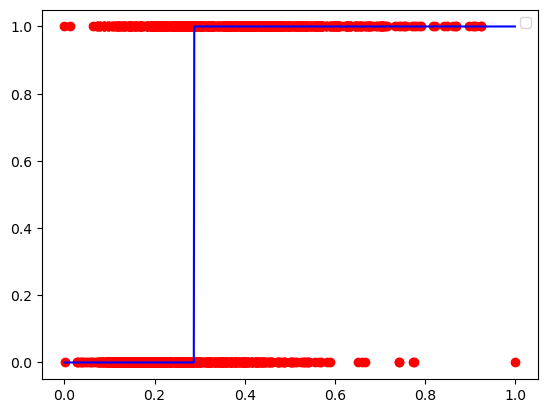

In [15]:
x_test = np.arange(0, 1, 1e-3)
y_pred = np.asarray([predict(w[-1], b[-1], x) for x in x_test ])

fig, axes = plt.subplots()
axes.plot(X_train, y_train, "ro")
axes.plot(x_test, y_pred, "b-")

axes.legend()
plt.show()

### Check by sklearn

In [16]:
lg = LogisticRegression(tol=1e-4, max_iter=1_000)
lg = lg.fit(X=X_train, y=y_train)

print(f"w:{lg.coef_} b:{lg.intercept_}")

w:[[5.83569495]] b:[-1.68056281]


In [17]:
x_test = np.asarray([[6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0]])
# x_test = features_scalling(x_test)
x_test = scaler_result.transform(x_test)
x_test = map_feature(x_test).reshape(-1,1)

scaler = MinMaxScaler()
res = scaler.fit(X_train)
X_train = res.transform(X_train)
# x_test = scaler_result.transform(x_test)
print(f"with {x_test}, the class is:{lg.predict(x_test)}")

with [[2760.75018192]], the class is:[1]


In [18]:
scaler = MinMaxScaler()
res = scaler.fit(X_train)
X_train = res.transform(X_train)
y_pred = np.asarray([lg.predict(x.reshape(-1, 1)) for x in X_train])
# y_pred = features_scalling(y_pred.reshape(-1, 1))

accuracy = accuracy_score(y_true=y_train, y_pred=np.round(y_pred), normalize=True)
print(f"accuracy={accuracy}")

f1_s = f1_score(y_true=y_train, y_pred=np.round(y_pred))
print(f"f1_score={f1_s}")

accuracy=0.699812382739212
f1_score=0.7125748502994012


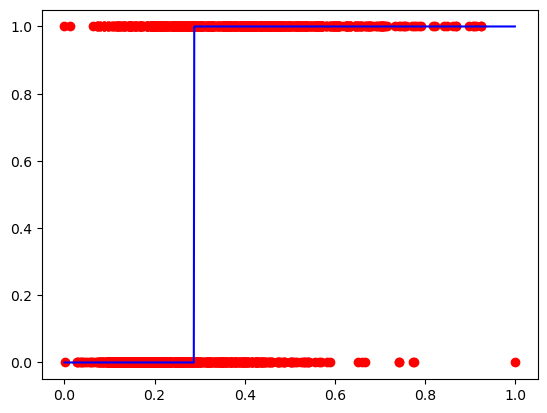

In [19]:
x_test = np.arange(0, 1, 1e-3)
# y_pred = np.asarray([lg.predict(x.reshape(-1, 1)) for x in x_test ])
y_pred = np.asarray([lg.predict(x.reshape(-1, 1)) for x in x_test ])

fig, axes = plt.subplots()
axes.plot(X_train, y_train, "ro")
axes.plot(x_test, y_pred, "b-")

# axes.legend()
plt.show()

In [20]:
%matplotlib tk
x_min, x_max = (-.5, 1.5)
x_test = np.arange(x_min, x_max, 1e-3)
# y_pred = np.asarray([lg.predict(x.reshape(-1, 1)) for x in x_test ])
y_pred_checked = np.asarray([lg.predict(x.reshape(-1, 1)) for x in x_test ])

fig, axes = plt.subplots()
axes.plot(X_train, y_train, "ro")
axes.plot(x_test, y_pred_checked, "g-")
y_pred_curve = np.asarray([sigmoid(w[-1]*x + b[-1]) for x in x_test ])
y_pred_line = np.asarray([predict(w[-1], b[-1], x) for x in x_test ])
curved = axes.plot(x_test, y_pred_curve, "b--")[0]
line = axes.plot(x_test, y_pred_line, "y-.")[0]

axes.axis([x_min, x_max, -0.5, 1.5])
curved.set_label("Sigmoid curve")
line.set_label("")
axes.legend()
def update_plot(i: int) -> None:
    if i < 100:
        time.sleep(0.09)
    y_pred_curve = np.asarray([sigmoid(w[i]*x + b[i]) for x in x_test])
    y_pred_line = np.asarray([predict(w[i], b[i], x) for x in x_test])
    curved.set_ydata(y_pred_curve)
    line.set_ydata(y_pred_line)
    return
ani1 = animation.FuncAnimation(fig=fig, func=update_plot, frames=len(w)-1, interval=10, repeat=False)
plt.show()